<a href="https://colab.research.google.com/github/siddharath28/customer_churn/blob/main/customer_churn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pylab import rcParams
%matplotlib inline

# Data Mining & Exploration

In [3]:

data=pd.read_csv("customer_churn.csv")

In [4]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


*Data compises of Services — which services the customer subscribed to (internet, phone, cable, etc.), Monthly bill total, Tenure — How long they had been a customer, Basic demographic info — whether they were elderly, had dependents, etc.*

In [6]:
data.shape

(7043, 21)

 # this shows 21 columns and 7043 rows in dataset

In [7]:
data.info() #info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [10]:
data.dtypes # data type

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

#Removing customer IDs from the data set the columns not used in the predictive model.


In [11]:
df = data.drop("customerID", axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


The dataset has a lot of categorical variables rendered as text values (‘Yes’,’No’,etc.) in the columns. Converting the categorical values into numeric values to facilitate ML algorithms to process the data.Also, converting Total Charges to a numerical data type.

In [12]:
df.TotalCharges = pd.to_numeric(df.TotalCharges, errors='coerce')
df.isnull().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

From the above output, it can be seen that, there are 11 missing values for Total Charges. Replacing 11 rows from the data set. Also predictor variable here is Churn. Therefore, it is necessary to convert the predictor variable in binary numeric variable.

In [13]:
df.dropna(inplace = True)

df['Churn'].replace(to_replace='Yes', value=1, inplace=True)
df['Churn'].replace(to_replace='No',  value=0, inplace=True)

# converting all the categorical variables into dummy variables
df_dummies = pd.get_dummies(df)
df_dummies.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.85,0,True,False,False,True,True,...,False,True,False,False,False,True,False,False,True,False
1,0,34,56.95,1889.50,0,False,True,True,False,True,...,False,False,True,False,True,False,False,False,False,True
2,0,2,53.85,108.15,1,False,True,True,False,True,...,False,True,False,False,False,True,False,False,False,True
3,0,45,42.30,1840.75,0,False,True,True,False,True,...,False,False,True,False,True,False,True,False,False,False
4,0,2,70.70,151.65,1,True,False,True,False,True,...,False,True,False,False,False,True,False,False,True,False


In [14]:
df_dummies.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 46 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   SeniorCitizen                            7032 non-null   int64  
 1   tenure                                   7032 non-null   int64  
 2   MonthlyCharges                           7032 non-null   float64
 3   TotalCharges                             7032 non-null   float64
 4   Churn                                    7032 non-null   int64  
 5   gender_Female                            7032 non-null   bool   
 6   gender_Male                              7032 non-null   bool   
 7   Partner_No                               7032 non-null   bool   
 8   Partner_Yes                              7032 non-null   bool   
 9   Dependents_No                            7032 non-null   bool   
 10  Dependents_Yes                           7032 non-nul

# Correlations between customer data features and customer churn
Examining the correlation between churn and each customer feature to decide which features of the data to include in the predictive churn model.

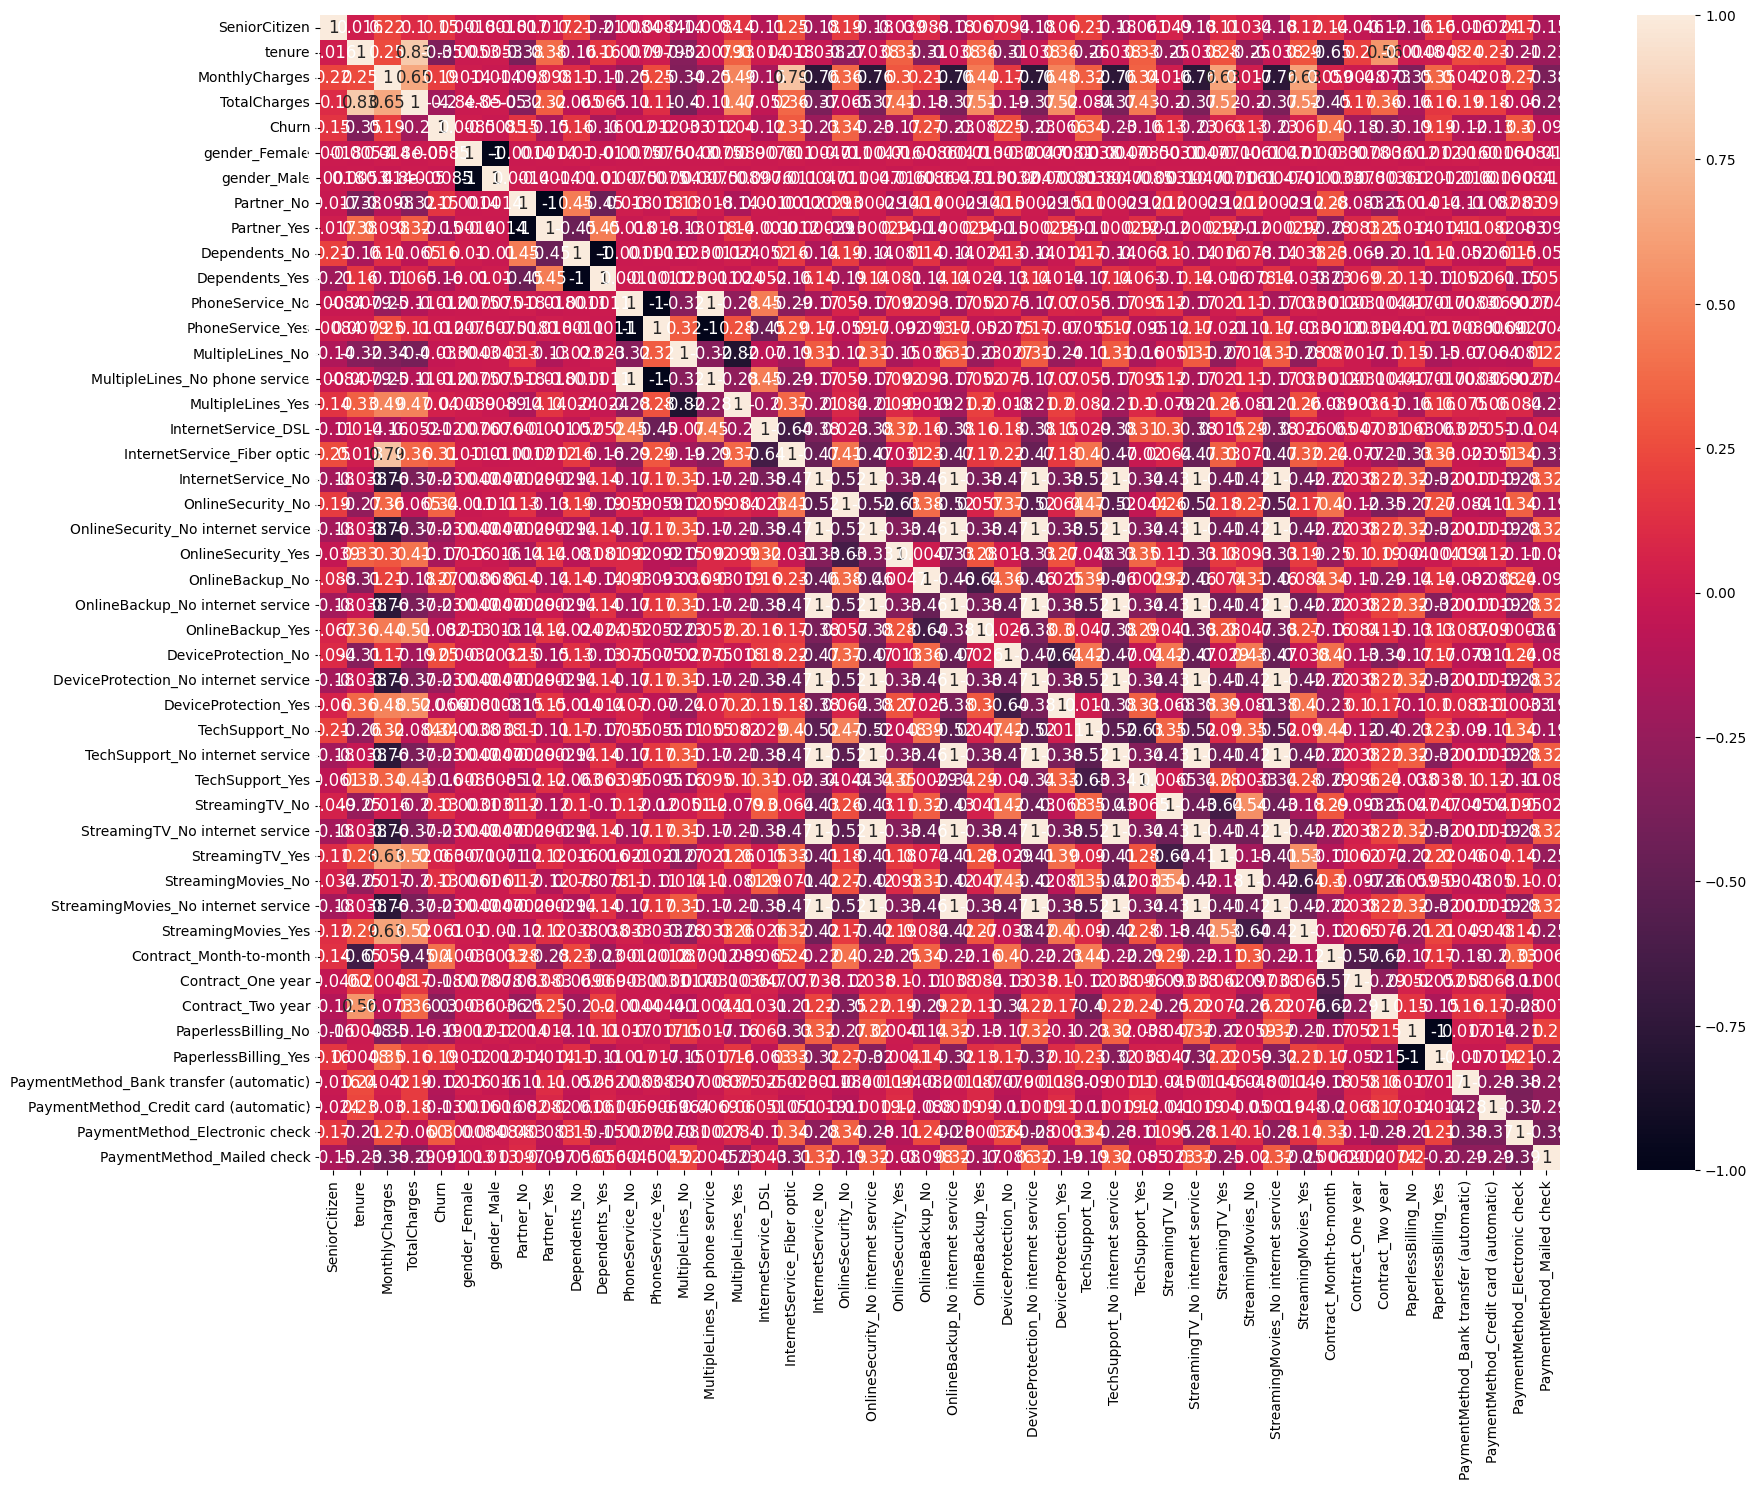

In [15]:
corr = df_dummies.corr()
sns.heatmap(corr, xticklabels=corr.columns.values, yticklabels=corr.columns.values, annot = True, annot_kws={'size':12})
heat_map=plt.gcf()
heat_map.set_size_inches(20,15)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

To avoid unstable estimates of coeffiecients in the model, need to drop the ‘TotalCharges’ variable during regression process, as it is highly correlated to both ‘Tenure’ and ‘MonthlyCharges’.

<Axes: >

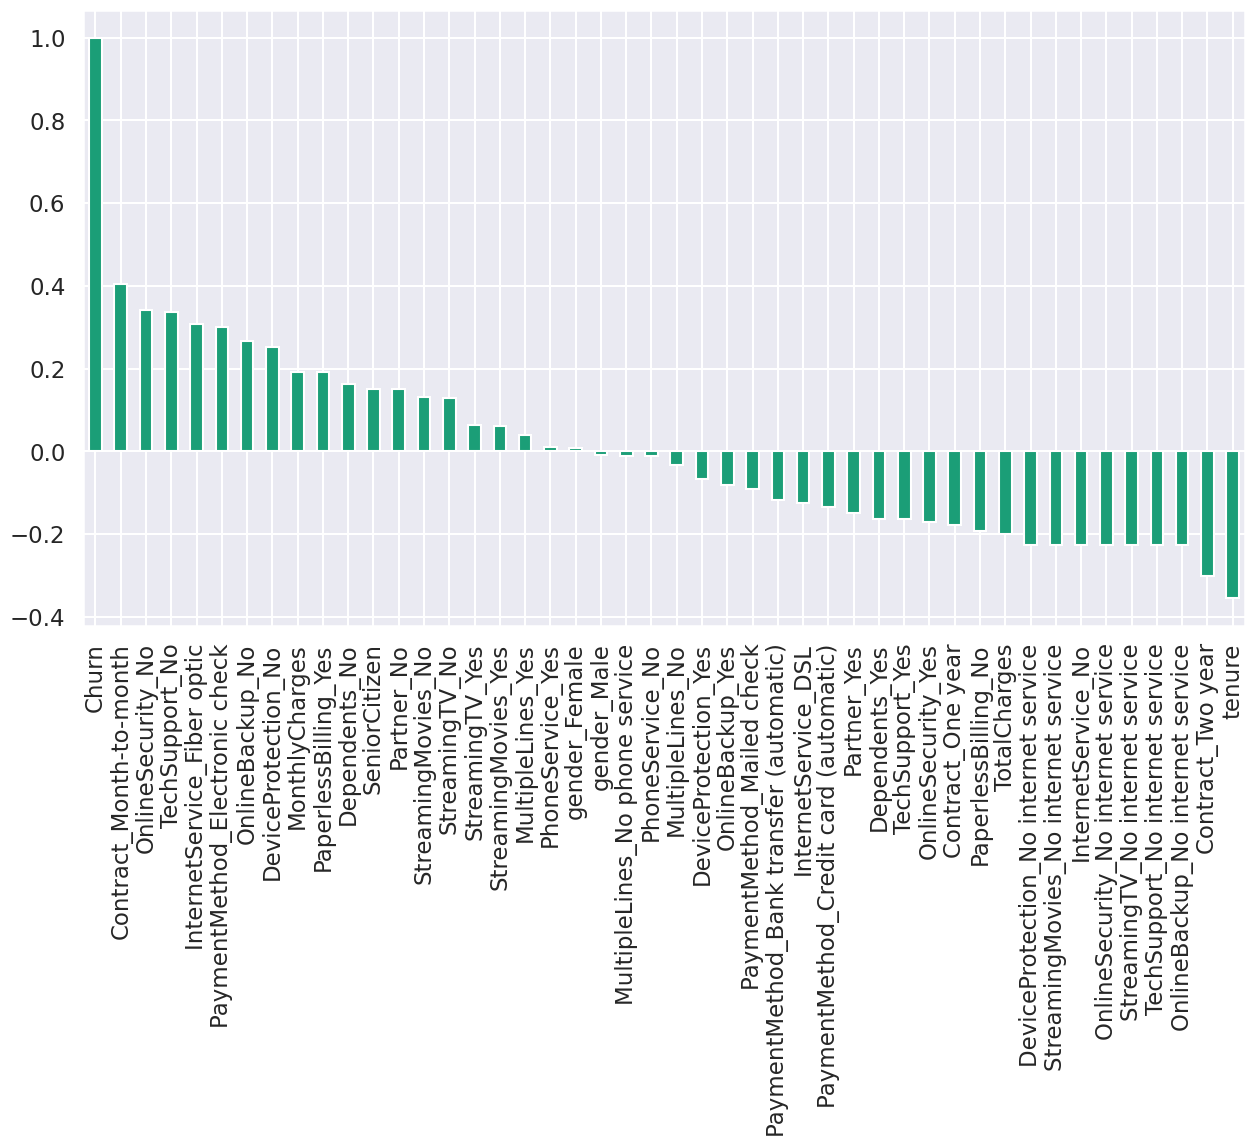

In [16]:
# Checking again Correlation of "Churn" with other variables on a different plot
sns.set(style='darkgrid', context='talk', palette='Dark2')
plt.figure(figsize=(15,8))
df_dummies.corr()['Churn'].sort_values(ascending = False).plot(kind='bar')

It can be seen from above correlation plot that, Contract_Month-to-month, Online security_No, Tech Support_No...etc. are positively correlated with Churn. While, on the other end of the plot, tenure, Contract_Two year, InternetService_No...etc. are negatively correlated with Churn.

Interestingly, services such as Online security, StreamingTV, OnlineBackup, TechSupport..., etc. with InternetService_No seem to be negatively related to Churn. Need to explore the patterns more for the above correlations below before modelling and identifying the important variables.

In [17]:
df_dummies.corr()  # reporting correlation matrix

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
SeniorCitizen,1.000000,0.015683,0.219874,0.102411,0.150541,0.001819,-0.001819,-0.016957,0.016957,0.210550,...,0.119842,0.137752,-0.046491,-0.116205,-0.156258,0.156258,-0.016235,-0.024359,0.171322,-0.152987
tenure,0.015683,1.000000,0.246862,0.825880,-0.354049,-0.005285,0.005285,-0.381912,0.381912,-0.163386,...,0.285402,-0.649346,0.202338,0.563801,-0.004823,0.004823,0.243822,0.232800,-0.210197,-0.232181
MonthlyCharges,0.219874,0.246862,1.000000,0.651065,0.192858,0.013779,-0.013779,-0.097825,0.097825,0.112343,...,0.627235,0.058933,0.004810,-0.073256,-0.351930,0.351930,0.042410,0.030055,0.271117,-0.376568
TotalCharges,0.102411,0.825880,0.651065,1.000000,-0.199484,-0.000048,0.000048,-0.319072,0.319072,-0.064653,...,0.519867,-0.446776,0.170569,0.358036,-0.157830,0.157830,0.186119,0.182663,-0.060436,-0.294708
Churn,0.150541,-0.354049,0.192858,-0.199484,1.000000,0.008545,-0.008545,0.149982,-0.149982,0.163128,...,0.060860,0.404565,-0.178225,-0.301552,-0.191454,0.191454,-0.118136,-0.134687,0.301455,-0.090773
gender_Female,0.001819,-0.005285,0.013779,-0.000048,0.008545,1.000000,-1.000000,-0.001379,0.001379,0.010349,...,0.010105,0.003251,-0.007755,0.003603,-0.011902,0.011902,0.015973,-0.001632,-0.000844,-0.013199
gender_Male,-0.001819,0.005285,-0.013779,0.000048,-0.008545,-1.000000,1.000000,0.001379,-0.001379,-0.010349,...,-0.010105,-0.003251,0.007755,-0.003603,0.011902,-0.011902,-0.015973,0.001632,0.000844,0.013199
Partner_No,-0.016957,-0.381912,-0.097825,-0.319072,0.149982,-0.001379,0.001379,1.000000,-1.000000,0.452269,...,-0.118108,0.280202,-0.083067,-0.247334,-0.013957,0.013957,-0.111406,-0.082327,0.083207,0.096948
Partner_Yes,0.016957,0.381912,0.097825,0.319072,-0.149982,0.001379,-0.001379,-1.000000,1.000000,-0.452269,...,0.118108,-0.280202,0.083067,0.247334,0.013957,-0.013957,0.111406,0.082327,-0.083207,-0.096948
Dependents_No,0.210550,-0.163386,0.112343,-0.064653,0.163128,0.010349,-0.010349,0.452269,-0.452269,1.000000,...,0.038375,0.229715,-0.069222,-0.201699,-0.110131,0.110131,-0.052369,-0.061134,0.149274,-0.056448


## Data exploration and Visualisation

Doing more visualization to better understand the patterns in the data and potentially form some hypothesis. First looking at the distribution of individual variables and then slice and dice the data for to check if interesting trends are present.

# Demographics to understand the gender, age range, patner and dependent status of the customers

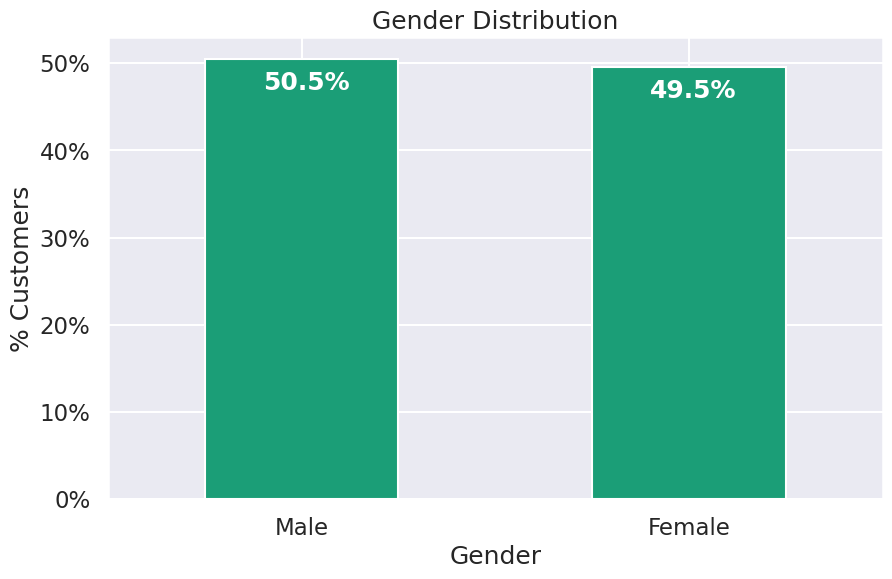

In [18]:
import matplotlib.ticker as mtick # For specifying the axes tick format
rcParams['figure.figsize']=10,6

ax = (df['gender'].value_counts()*100.0 /len(df)).plot(kind='bar', stacked = True, rot = 0)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_ylabel('% Customers')
ax.set_xlabel('Gender')
ax.set_ylabel('% Customers')
ax.set_title('Gender Distribution')

totals = []  # creating a list to collect the plt.patches data

# finding the values and append to list
for i in ax.patches:
    totals.append(i.get_width())

total = sum(totals)  # setting individual bar lables using above list

for i in ax.patches:
    # getting_width pulls left or right; get_y pushes up or down
    ax.text(i.get_x()+.15, i.get_height()-3.5, \
            str(round((i.get_height()/total), 1))+'%', color='white', weight = 'bold')

Text(0.5, 1.0, '% of Senior Citizens')

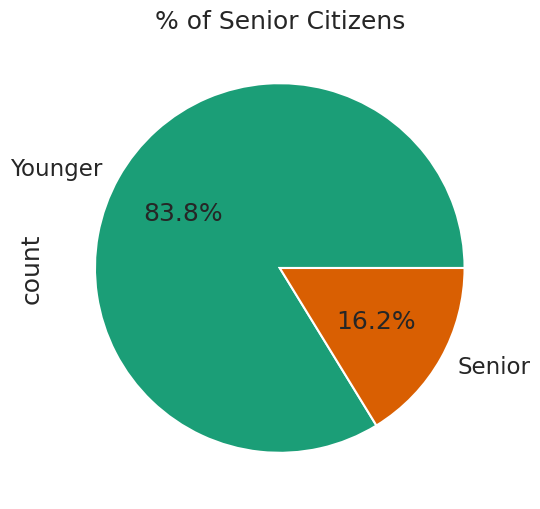

In [19]:
ax = (df['SeniorCitizen'].value_counts()*100.0 /len(df))\
.plot.pie(autopct='%.1f%%', labels = ['Younger', 'Senior'])
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_title('% of Senior Citizens')

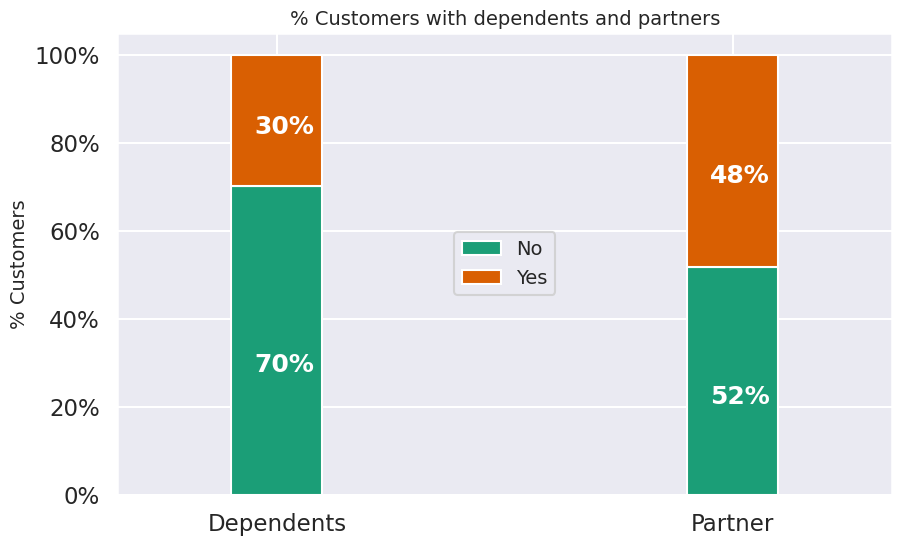

In [20]:
df = pd.melt(data, id_vars=['customerID'], value_vars=['Dependents','Partner'])
df1 = df.groupby(['variable','value']).count().unstack()
df1 = df1*100/len(data)
ax = df1.loc[:,'customerID'].plot.bar(stacked=True, figsize=(10,6),rot = 0,width = 0.2)

ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_ylabel('% Customers',size = 14)
ax.set_xlabel('')
ax.set_title('% Customers with dependents and partners',size = 14)
ax.legend(loc = 'center',prop={'size':14})

for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.annotate('{:.0f}%'.format(height), (p.get_x()+.25*width, p.get_y()+.4*height),
                color = 'white',
               weight = 'bold')

From above plot, it can be seen that, 48% of the customers have a partner channel, while only 30% of the total customers have dependents.

It would be interesting is to look at the % of customers with both partners and dependents.

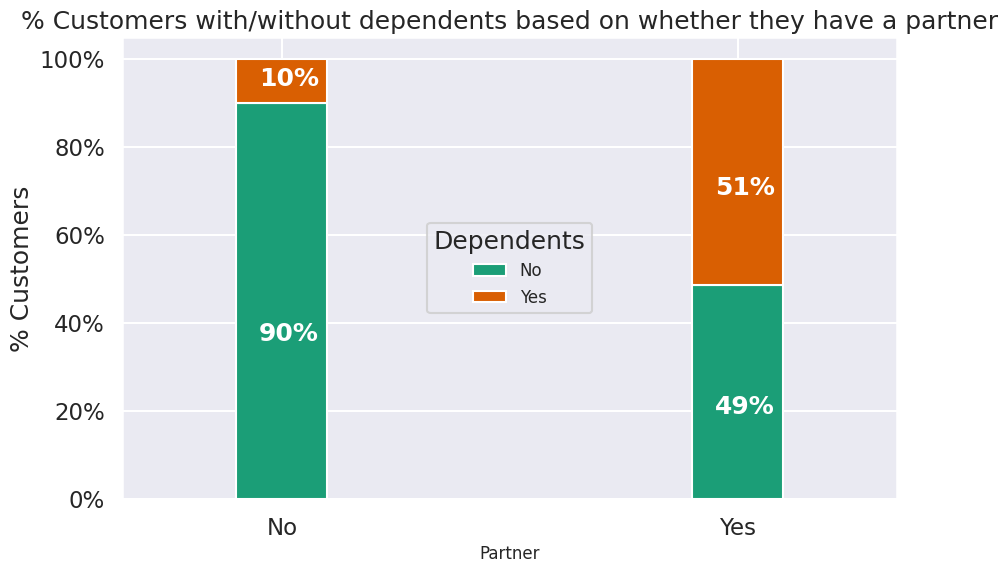

In [21]:
partner_dependents = data.groupby(['Partner','Dependents']).size().unstack()

ax = (partner_dependents.T*100.0 / partner_dependents.T.sum()).T.plot(kind='bar',
                                                                width = 0.2,
                                                                stacked = True,
                                                                rot = 0,
                                                                figsize = (10,6))
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.legend(loc='center',prop={'size':12},title = 'Dependents')
ax.set_ylabel('% Customers')
ax.set_title('% Customers with/without dependents based on whether they have a partner')
ax.xaxis.label.set_size(12)

# Code to add the data labels on the stacked bar chart
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.annotate('{:.0f}%'.format(height), (p.get_x()+.25*width, p.get_y()+.4*height),
                color = 'white',
               weight = 'bold')

Interestingly, among the customers who have a partner, only about half of them (51%) also have a dependent, while other half (49%) do not have any independents. Additionally, as expected, among the customers who do not have any partner, a majority (90%) of them do not have any dependents

A review of any differences between the % of customers with/without dependents and partners by gender reveal that, there is no difference in their distribution by gender. Additionally, there is no difference in senior citizen status by gender.

**Customer Account Information**

<ipython-input-22-2293eeeeed95>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  x = sns.distplot(data['tenure'], hist=True, kde=False,


Text(0.5, 1.0, 'Number of Customers by tenure')

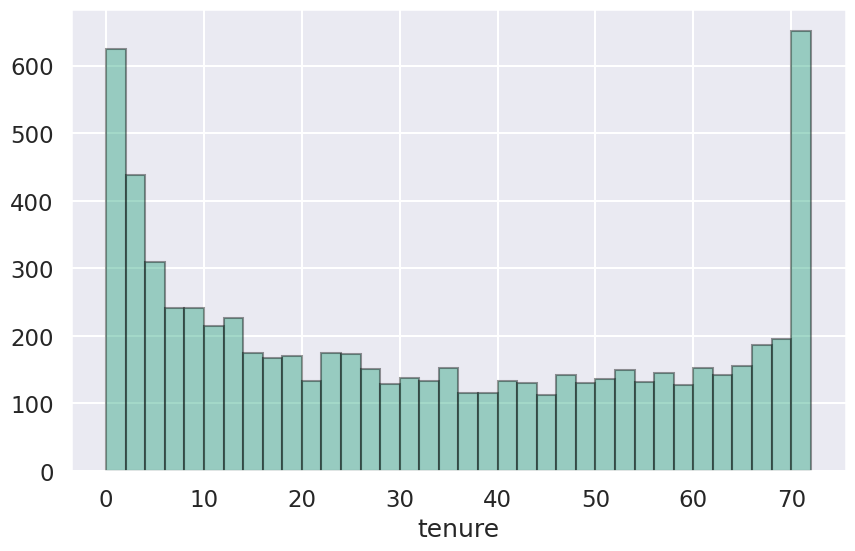

In [22]:
x = sns.distplot(data['tenure'], hist=True, kde=False,
             bins=int(180/5),
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})
ax.set_ylabel('Number of Customers')
ax.set_xlabel('Tenure (months)')
ax.set_title('Number of Customers by tenure')

The above histogram displays a lot of customers have been with the telecom company for just a month, while quite a many are there for about 70 months. This could be potentially because of different contractual agrrement some customers might have.

**Checking the customers by tenure of contract**

Text(0.5, 1.0, 'Number of Customers by Contract Type')

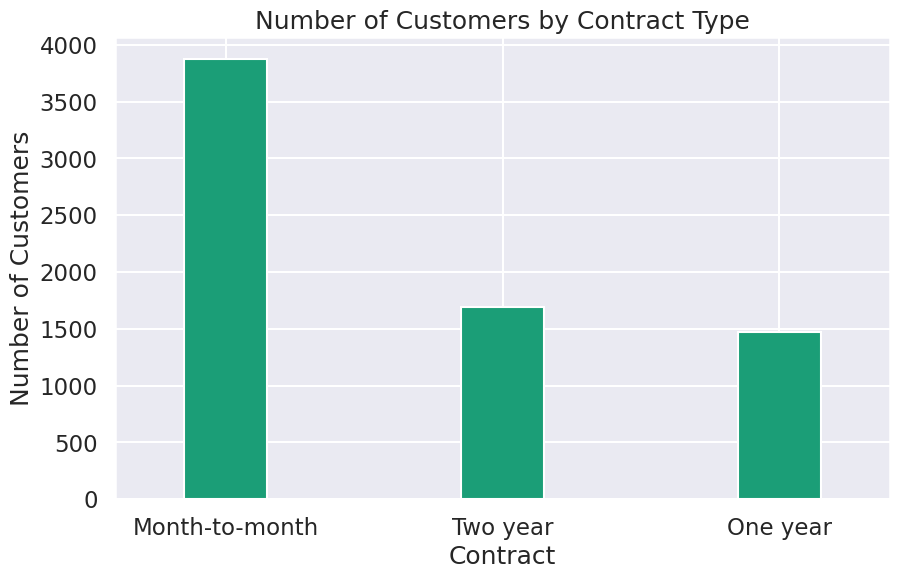

In [23]:
ax = data['Contract'].value_counts().plot(kind = 'bar',rot = 0, width = 0.3)
ax.set_ylabel('Number of Customers')
ax.set_title('Number of Customers by Contract Type')

Interestingly most of the monthly contracts last for 1-2 months, while the 2 year contracts tend to last for about 70 months. This shows that the customers taking a longer contract are more loyal to the company and tend to stay with it for a longer period of time. This is also visible on the correlation chart with the churn rate. More of less equal number of customers in the 1 year and 2 year contracts; around 1500 customers are on 1 year contract and close to around 1700 customers are on 2 years contracts.

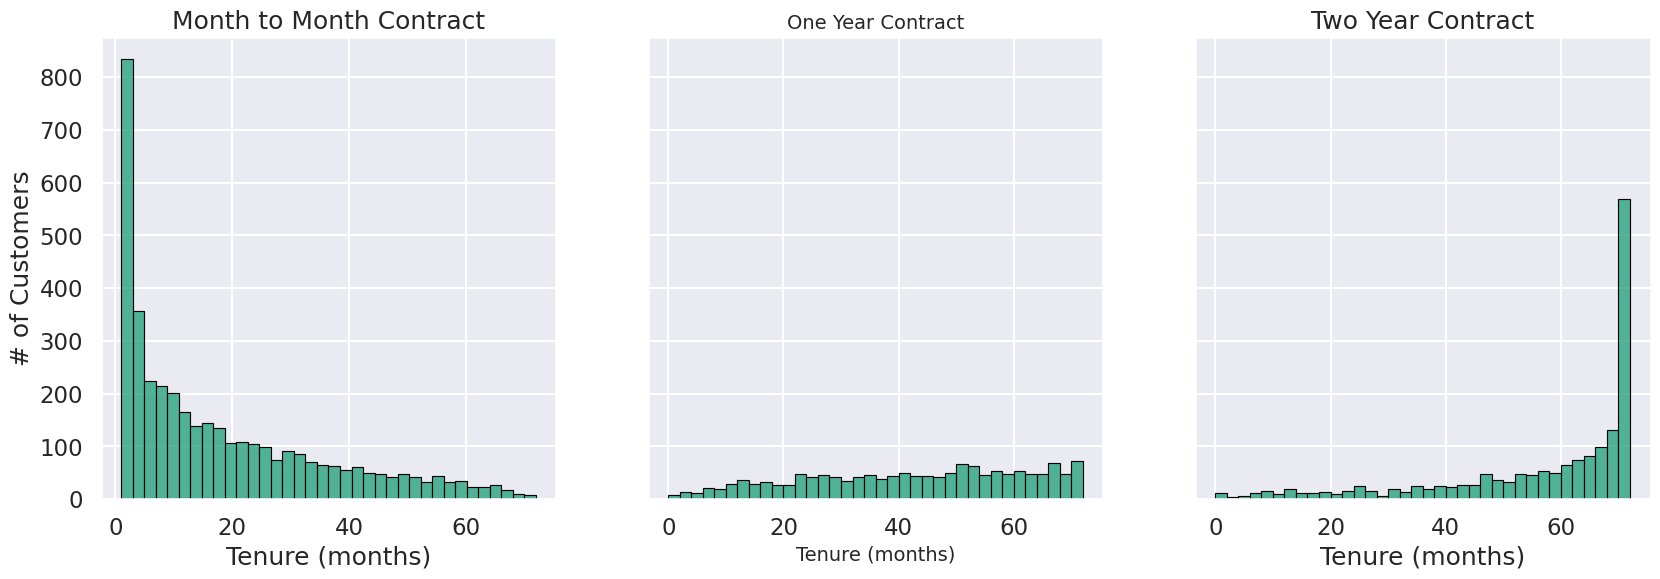

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, sharey=True, figsize=(20, 6))

ax = sns.histplot(data[data['Contract'] == 'Month-to-month']['tenure'],
                  bins=int(180 / 5),
                  edgecolor='black',
                  ax=ax1)
ax.set_ylabel('# of Customers')
ax.set_xlabel('Tenure (months)')
ax.set_title('Month to Month Contract')

ax = sns.histplot(data[data['Contract'] == 'One year']['tenure'],
                  bins=int(180 / 5),
                  edgecolor='black',
                  ax=ax2)
ax.set_xlabel('Tenure (months)', size=14)
ax.set_title('One Year Contract', size=14)

ax = sns.histplot(data[data['Contract'] == 'Two year']['tenure'],
                  bins=int(180 / 5),
                  edgecolor='black',
                  ax=ax3)
ax.set_xlabel('Tenure (months)')
ax.set_title('Two Year Contract')

plt.show()


**Visualization of the distribution of various services used by customers**


In [29]:
data.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

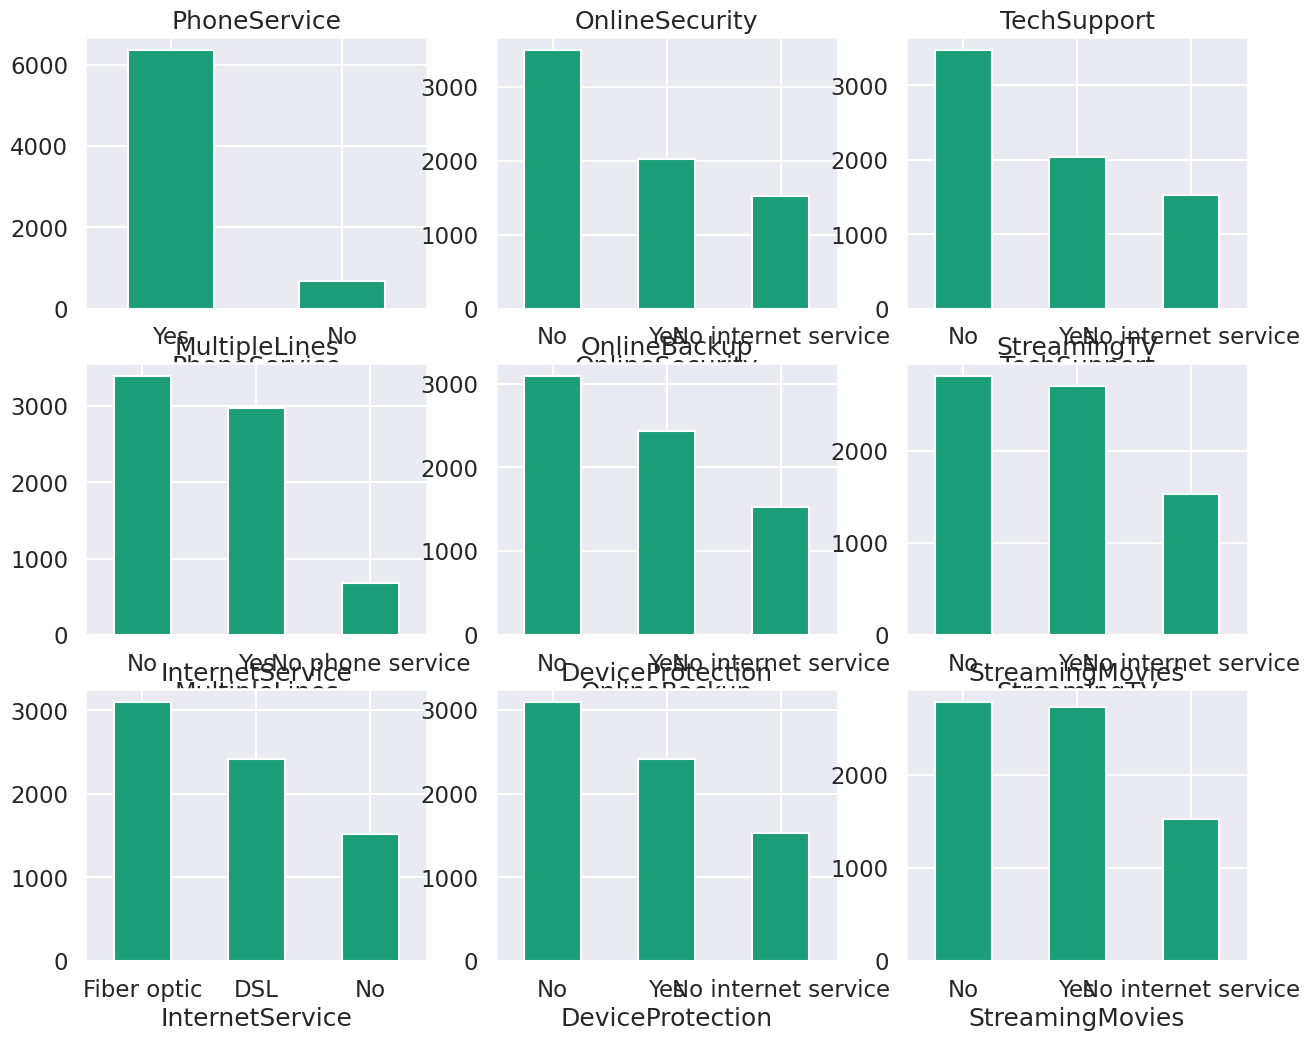

In [30]:
services = ['PhoneService','MultipleLines','InternetService','OnlineSecurity',
           'OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies']

fig, axes = plt.subplots(nrows = 3,ncols = 3,figsize = (15,12))
for i, item in enumerate(services):
    if i < 3:
        ax = data[item].value_counts().plot(kind = 'bar',ax=axes[i,0],rot = 0)

    elif i >=3 and i < 6:
        ax = data[item].value_counts().plot(kind = 'bar',ax=axes[i-3,1],rot = 0)

    elif i < 9:
        ax = data[item].value_counts().plot(kind = 'bar',ax=axes[i-6,2],rot = 0)
    ax.set_title(item)

Above plot displays a clear visbility of the different services provided by the Telecom company and availabled by the customers.

**Datamining to check prediction variable and it's interaction with other variables**

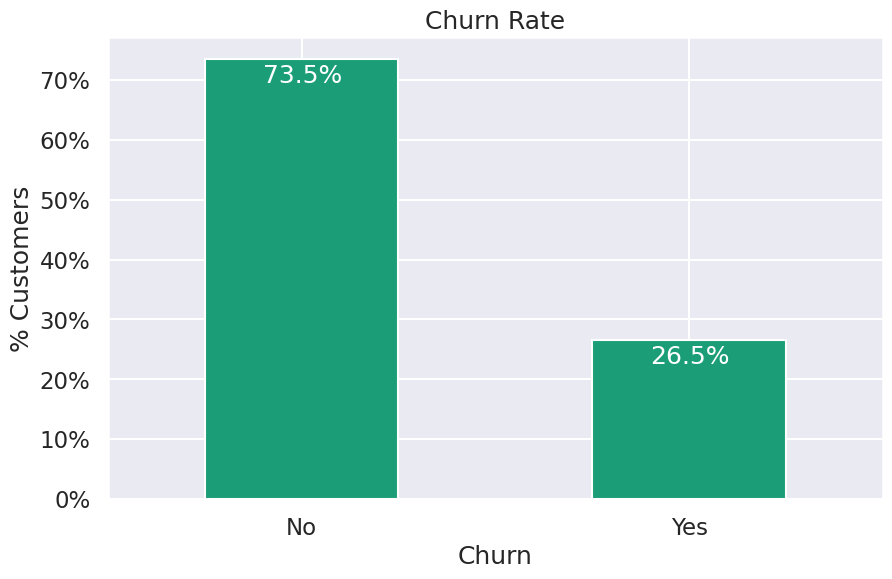

In [31]:
ax = (data['Churn'].value_counts()*100.0 /len(data)).plot(kind='bar', stacked = True,rot = 0)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_ylabel('% Customers')
ax.set_xlabel('Churn')
ax.set_title('Churn Rate')

# create a list to collect the plt.patches data
totals = []

# find the values and append to list
for i in ax.patches:
    totals.append(i.get_width())

# set individual bar lables using above list
total = sum(totals)

for i in ax.patches:
    # get_width pulls left or right; get_y pushes up or down
    ax.text(i.get_x()+.15, i.get_height()-4.0, \
            str(round((i.get_height()/total), 1))+'%', color='white')

26.5% churn rate is cosidered quite high. However, 73.5 % of the customers do not churn. Clearly the data is skewed as it is always expected that a large majority of the customers to not churn. Skeweness could lead to a lot of false negatives in predictive modeling.

Text(0, 0.5, 'Monthly Charges')

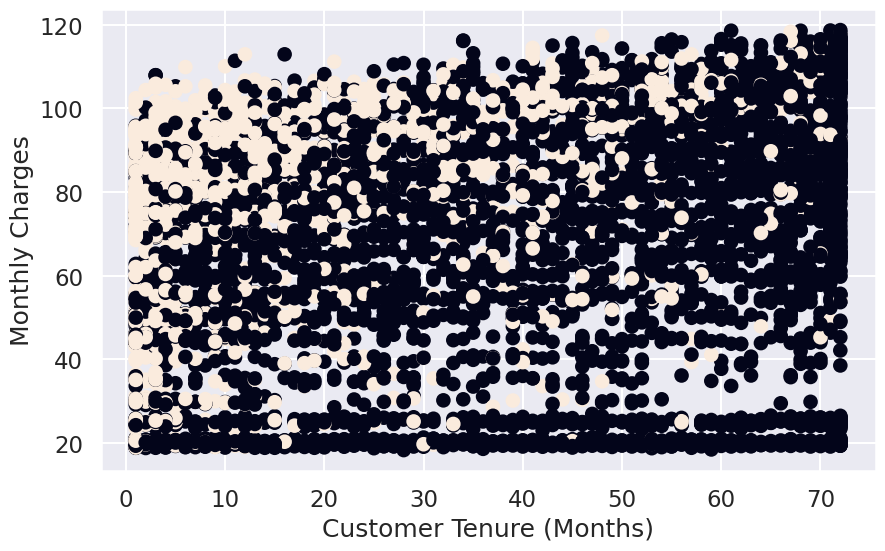

In [32]:
rcParams['figure.figsize']=10,6
sns.set(style='darkgrid', context='talk', palette='Dark2')

plt.scatter(
   df_dummies['tenure'],
 df_dummies['MonthlyCharges'], c=df_dummies['Churn'])
plt.xlabel('Customer Tenure (Months)')
plt.ylabel('Monthly Charges')

It’s hard to draw any conclusions from this visualization which compares the customer’s tenure with their monthly charges. So, this plot has been redrawn on boxplot for better visualization. However, from below plot, it can be clearly seen that, the customers who do not churn, they tend to stay for a longer tenure with the telecom company.

<Axes: xlabel='Churn', ylabel='tenure'>

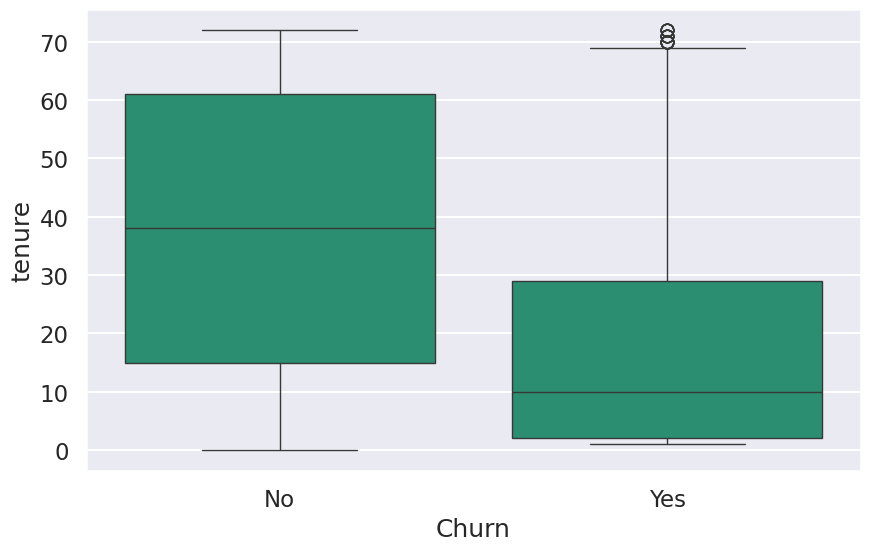

In [33]:
sns.boxplot(x = data.Churn, y = data.tenure)

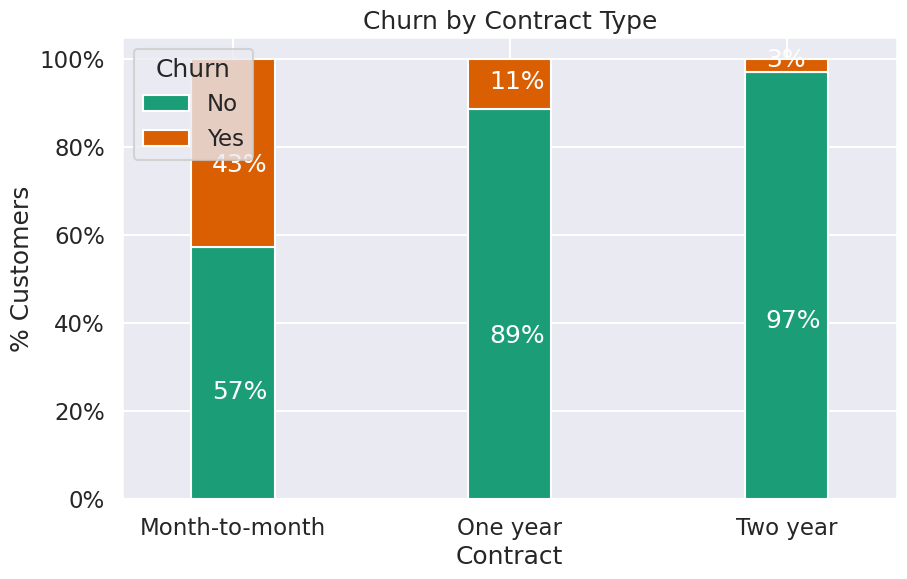

In [34]:
contract_churn = data.groupby(['Contract','Churn']).size().unstack()

ax = (contract_churn.T*100.0 / contract_churn.T.sum()).T.plot(kind='bar',width = 0.3,stacked = True,rot = 0)

ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.legend(loc='best',title = 'Churn')
ax.set_ylabel('% Customers')
ax.set_title('Churn by Contract Type')

for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.annotate('{:.0f}%'.format(height), (p.get_x()+.25*width, p.get_y()+.4*height),
                color = 'white')

Above plot too is no different from the correlation plot and information we obtained so far, the customers who have a month to month contract have a very high churn rate. This gives some valuable input to sales/marketing department.

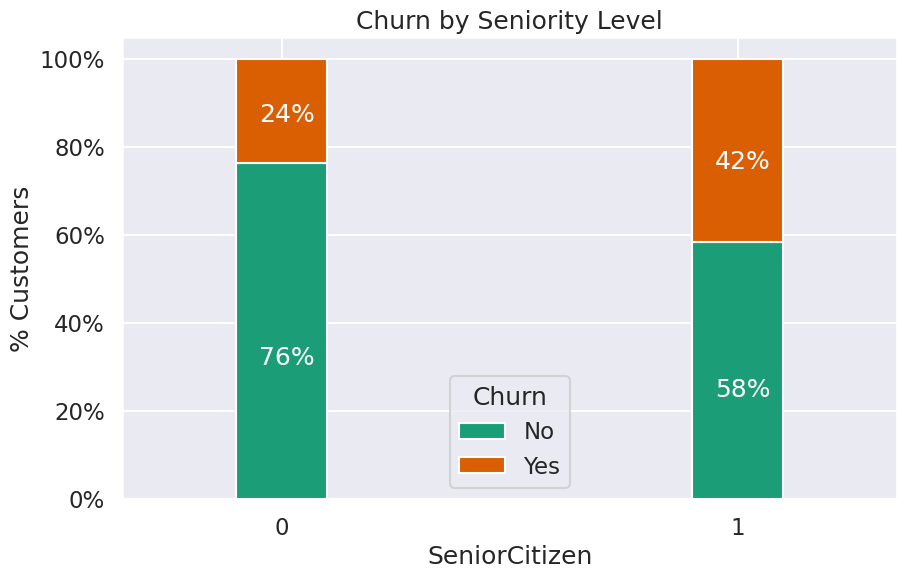

In [35]:
seniority_churn = data.groupby(['SeniorCitizen','Churn']).size().unstack()

ax = (seniority_churn.T*100.0 / seniority_churn.T.sum()).T.plot(kind='bar', width = 0.2, stacked = True, rot = 0)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.legend(loc='best',title = 'Churn')
ax.set_ylabel('% Customers')
ax.set_title('Churn by Seniority Level')

for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.annotate('{:.0f}%'.format(height), (p.get_x()+.25*width, p.get_y()+.4*height),color = 'white')

From above plot, it is aparent that senior Citizens have almost double the churn rate than younger population. To explore the reason, the below plot was drawn which clearly shows higher % of customers churn when the monthly charges are high. This includes Sr Citizens too.

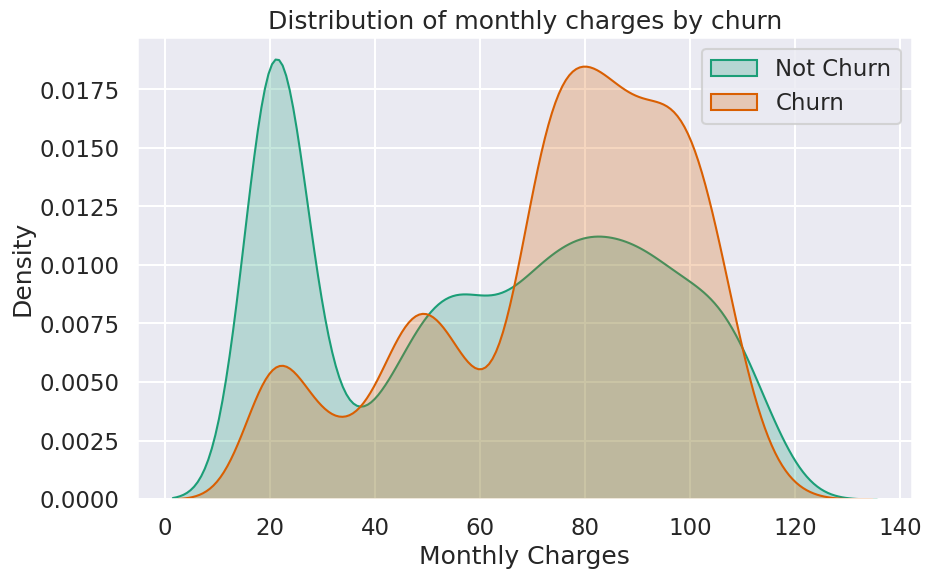

In [37]:
import seaborn as sns

ax = sns.kdeplot(data.MonthlyCharges[(data["Churn"] == 'No')], fill=True)
ax = sns.kdeplot(data.MonthlyCharges[(data["Churn"] == 'Yes')], ax=ax, fill=True)
ax.legend(["Not Churn", "Churn"], loc='best')
ax.set_ylabel('Density')
ax.set_xlabel('Monthly Charges')
ax.set_title('Distribution of monthly charges by churn')

plt.show()


## **Assumptions**
For the purpose of this analysis, 2 assumptions can be made:

1.   For each customer that left the company, it would cost Telco dollar 500.00 to replace that customer. Marketing, ads, campaigns, and outreach — the cost adds up.
2.   Retain each customer who was likely to churn by investing dollar 100 in them. This could be through discounts, improving service (upping their internet speed, for example), or offering perks.



Above measures are part of diagnostic analytic.

# **Predictive modelling**

We will consider several different models to predict customer churn. To ensure we are not over-fitting to our data, we will split the 7,043 customer records into a training and test set, with the test set being 20% of the total records. It is important to scale the variables in regression so that all of them are within a range of 0 to 1.

Logistic regression requires there to be little or no multicollinearity among the independent variables. Therefore, as discussed in the begining, Total Charges will be removed.

In [38]:
df_dummies = df_dummies.drop("TotalCharges", axis=1) # removing Total Charges to avoid multicolinearity.

# Using the data frame where we had created dummy variables
y = df_dummies['Churn'].values
X = df_dummies.drop(columns = ['Churn'])

# Scaling all the variables to a range of 0 to 1
from sklearn.preprocessing import MinMaxScaler
features = X.columns.values
scaler = MinMaxScaler(feature_range = (0,1))
scaler.fit(X)
X = pd.DataFrame(scaler.transform(X))
X.columns = features

# **Methodology**

Our first step was to split our data into training and test sets using train-test-split, which would allow us to cross-validate our results later. We also stratified the train-test-split, to ensure that the same proportion of our target variable was found in both our training and test sets.

# **Spiliting the data**
X is the data with the independent variables, Y is the data with the dependent variable. The test size variable determines in which ratio the data will be split. It is quite common to do this in a 80 Training / 20 Test ratio. Also ned to stratify the train-test-split to have a balanced split

In [39]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101, stratify=y)
print('length of X_train and x_test: ', len(X_train), len(X_test))
print('length of y_train and y_test: ', len(y_train), len(y_test))

length of X_train and x_test:  5625 1407
length of y_train and y_test:  5625 1407


# **Logistic regression**
Using machine learning algorithm and the dependent variable here churn 1 or churn 0 is categorical. The trained model can be used to predict if a customer churned or not for the test dataset. The results are saved in “prediction_test” and afterwards the accuracy score is measured and printed.

In [40]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn import metrics

model = LogisticRegression(solver='lbfgs', max_iter=1000)
result = model.fit(X_train, y_train)

prediction_test = model.predict(X_test)
y_pred = prediction_test #prediction

# Print the prediction accuracy
print ("Prdiction:",metrics.accuracy_score(y_test, y_pred))

# Model Precision
print("Precision:",metrics.precision_score(y_test, y_pred))

# Model Recall
print("Recall:",metrics.recall_score(y_test, y_pred))

Prdiction: 0.8017057569296375
Precision: 0.6655052264808362
Recall: 0.5106951871657754


In [41]:
print('Intercept: ' + str(result.intercept_)) # reporting the intercept
print('Regression: ' + str(result.coef_)) # reporting the co-efficients

Intercept: [-0.98796454]
Regression: [[ 0.18715203 -2.43931051 -0.00852662  0.01488481 -0.01485236  0.01063183
  -0.01059938  0.11062872 -0.11059627  0.11728073 -0.11724828 -0.17017432
   0.11728073  0.05292604 -0.45958971  0.56526352 -0.10564136  0.22501643
  -0.10564136 -0.11934262  0.11825689 -0.10564136 -0.01258308  0.04802402
  -0.10564136  0.05764979  0.22540661 -0.10564136 -0.11973279 -0.08884815
  -0.10564136  0.19452196 -0.08917765 -0.10564136  0.19485146  0.6214897
  -0.04373557 -0.57772168 -0.15446256  0.15449501 -0.03627493 -0.15979595
   0.24576997 -0.04966664]]


Confusion matrix
[[937  96]
 [183 191]]


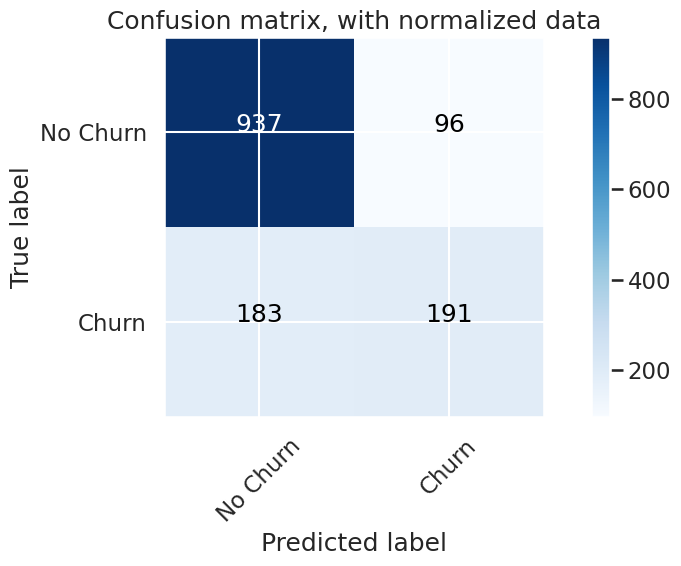

In [42]:
import itertools

#Evaluation of Model - Confusion Matrix Plot
def plot_confusion_matrix(cm, classes, title ='Confusion matrix', normalize = False, cmap = plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()


# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, prediction_test)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['No Churn','Churn'],
                      title='Confusion matrix, with normalized data')

**The classification rate of 80%, considered as good accuracy. However, it may not be the right measure at times, when the data is skewed and target class is not balanced . So, additional measures like Precision, Recall, F score (combined metric) have been considered.**

However, the precision (0.66%) and recall (0.51%) for predictions in the positive class (churn) are relatively low, which suggests the data set may be imbalanced.

The confusion matrix clearly shows the model performance broken down into true positives, true negatives, false positives, and false negatives.

Precision is the ability of a classiifer not to label an instance positive that is actually negative. For each class it is defined as as the ratio of true positives to the sum of true and false positives.

Recall is the ability of a classifier to find all positive instances. For each class it is defined as the ratio of true positives to the sum of true positives and false negatives.

The F1 score is a weighted harmonic mean of precision and recall such that the best score is 1.0 and the worst is 0.0. The end goal for the project is to know every single customer who will churn and how much insight can be generated. Target is to focus on to keep the cutomers and how much company could spend to keep them before having them as a customer turned into a loss. So considering the final goal is to reduce churn and take the right preventing actions in time, need to check which independent variables have the most influence on the predicted outcome. Therefore setting the coefficients in the model to zero and reviewing at the weights of each variable.

In [43]:
#F1 Score
f1 = (2*0.6577181208053692*0.5521126760563381)/(0.6577181208053692 + 0.5521126760563381)
print("F1 Score {:0.2f}".format(f1))

F1 Score 0.60


In [44]:
# To get the weights of all the variables
weights = pd.Series(model.coef_[0],index=X.columns.values)
weights.sort_values(ascending = False)

Contract_Month-to-month                    0.621490
InternetService_Fiber optic                0.565264
PaymentMethod_Electronic check             0.245770
TechSupport_No                             0.225407
OnlineSecurity_No                          0.225016
StreamingMovies_Yes                        0.194851
StreamingTV_Yes                            0.194522
SeniorCitizen                              0.187152
PaperlessBilling_Yes                       0.154495
OnlineBackup_No                            0.118257
PhoneService_No                            0.117281
MultipleLines_No phone service             0.117281
Dependents_No                              0.110629
DeviceProtection_Yes                       0.057650
MultipleLines_Yes                          0.052926
DeviceProtection_No                        0.048024
gender_Female                              0.014885
Partner_No                                 0.010632
MonthlyCharges                            -0.008527
Partner_Yes 

# **It can be observed that some variables have a positive relation to our predicted variable (Churn) and some have a negative relation.**
- “Contract_Month-to-month”: The positive relation to churn means that having this type of contract also increases the
   probability of a customer to churn.
- “Contract_Two year” is in a highly negative relation to the predicted variable, which means that customers with this type
   of contract are very unlikely to churn.
Some of the variables do not make sense in the first point.

“Fiber_Optic” is on top of this list in terms of a positive impact on churn. While it is expected that advantage of Fiber optic makes a customer stay, but the model has a different story to tell. Here it is important to delve deeper into the analysis and get some context for the data.

# **AUC (Area Under The Curve) ROC (Receiver Operating Characteristics) curve**
AUCROC tells how much the model is capable of distinguishing between Churn and NoChurn. Higher the AUC, better the model is at predicting 0s as 0s and 1s as 1s. By analogy, Higher the AUC, better the model is at distinguishing between Churn and NoChurn

In [46]:
pip install scikit-plot


In [48]:
pip install --upgrade scikit-plot


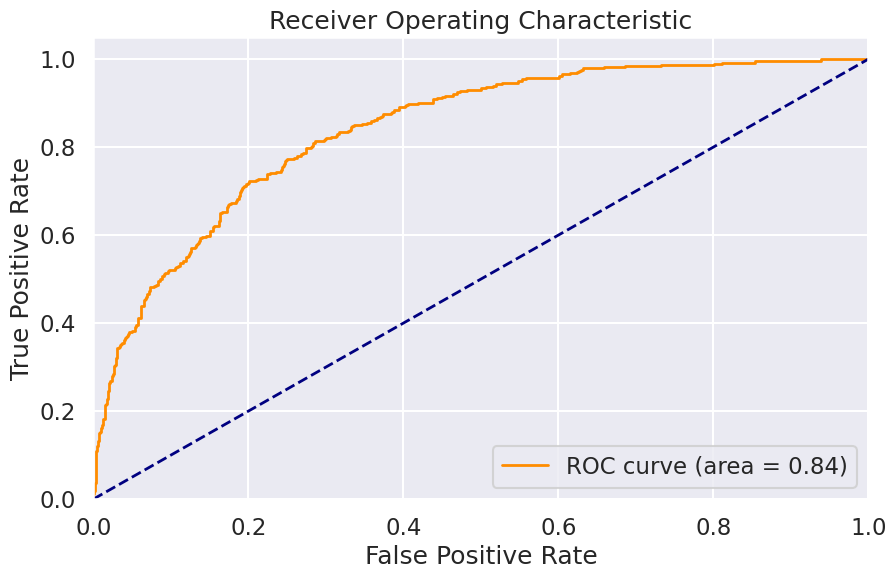

In [52]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

y_pred_proba = model.predict_proba(X_test)

# Compute ROC curve and ROC area for each class
fpr, tpr, _ = roc_curve(y_test, y_pred_proba[:, 1])
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


Area Under ROC Curve (AUROC) represents the likelihood of the model distinguishing observations between two classes. AUROC gives a single measure of how a model’s true positive rate and false positive rate change with different threshold values. The closer a model’s AUROC score is to 1, the better it is. In the above plot, both are above 0.5 however, suggesting that both models have the ability to distiguish between observations from each class.

AUC is 0.84 means there is 84% chance that model will be able to distinguish between Churn and NoChurn.

**Handling imbalanced classes**

In [53]:
df_dummies['Churn'].value_counts()

Churn
0    5163
1    1869
Name: count, dtype: int64

The class for churn is only around 30% of the total population of samples. There is a real risk thatthe model trained on this data may only make too many predictions in favour of the majority class. To balance the data set, need to randomly duplicate observations from the minority class.

In [54]:
from sklearn.utils import resample

data_majority = df_dummies[df_dummies['Churn']==0]
data_minority = df_dummies[df_dummies['Churn']==1]

data_minority_upsampled = resample(data_minority,
replace=True,
n_samples=5163, #same number of samples as majority class
random_state=1) #set the seed for random resampling

# Combine resampled results
data_upsampled = pd.concat([data_majority, data_minority_upsampled])
data_upsampled['Churn'].value_counts()

Churn
0    5163
1    5163
Name: count, dtype: int64

**Now that we have a 1:1 ratio for our classes, will train another logistic regression model**

In [55]:
from sklearn.metrics import classification_report

train, test = train_test_split(data_upsampled, test_size = 0.20)

train_y_upsampled = train['Churn']
test_y_upsampled = test['Churn']

train_x_upsampled = train
train_x_upsampled.pop('Churn')
test_x_upsampled = test
test_x_upsampled.pop('Churn')

logisticRegr_balanced = LogisticRegression(solver='lbfgs', max_iter=1000)
logisticRegr_balanced.fit(X=train_x_upsampled, y=train_y_upsampled)

test_y_pred_balanced = logisticRegr_balanced.predict(test_x_upsampled)

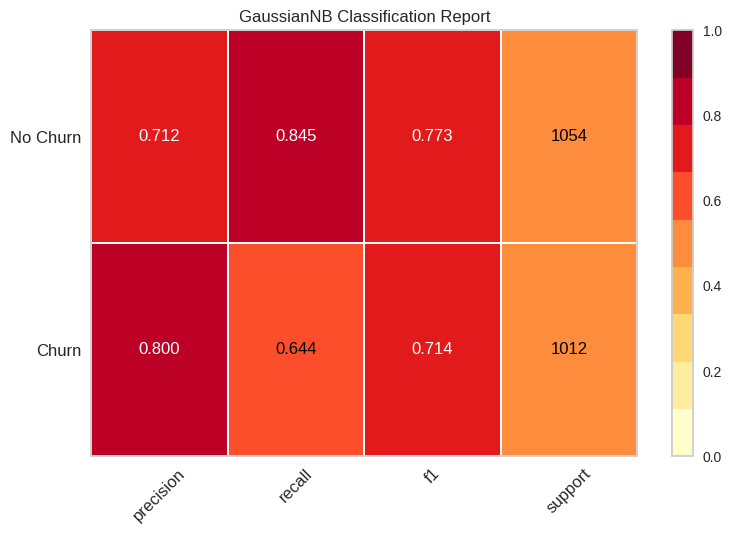

In [56]:
from sklearn.naive_bayes import GaussianNB
from yellowbrick.classifier import ClassificationReport

classes=['Churn','No Churn']

# Instantiate the classification model and visualizer
bayes = GaussianNB()
visualizer = ClassificationReport(bayes, classes=classes, support=True)

visualizer.fit(train_x_upsampled, train_y_upsampled)  # Fit the visualizer and the model
visualizer.score(test_x_upsampled, test_y_upsampled)  # Evaluate the model on the test data
g = visualizer.poof()

**From above output it can be see that, the overall accuracy of the model has decreased, but the precision and recall scores for predicting a churn have improved.**

Support is the number of actual occurrences of the class in the specified dataset. Imbalanced support in the training data may indicate structural weaknesses in the reported scores of the classifier and could indicate the need for stratified sampling or rebalancing. Support doesn’t change between models but instead diagnoses the evaluation process.

The model’s precision for No Churn 69%) is lower than Churn (82%) but precision is higher (86%) than churn (62%). The F1-score for the NoChurn is higher (76.6%), while for the Churn is is 71%. The overall accuracy of the model has decreased, but the precision and recall scores for predicting a churn have improved in this model.

In [57]:
from sklearn.metrics import roc_auc_score


# Get class probabilities for both models
test_y_prob = model.predict_proba(X_test)
test_y_prob_balanced = model.predict_proba(test_x_upsampled)


# We only need the probabilities for the positive class
test_y_prob = [p[1] for p in test_y_prob]
test_y_prob_balanced = [p[1] for p in test_y_prob_balanced]

print('Unbalanced model AUROC: ' + str(roc_auc_score(y_test, test_y_prob)))
print('Balanced model AUROC: ' + str(roc_auc_score(test_y_upsampled, test_y_prob_balanced)))

Unbalanced model AUROC: 0.8408094382697195
Balanced model AUROC: 0.7483682526944222


# AUROC scores are >7.0 in both the models. Unbalanced model is >8.0. This suggests that both models have the ability to distiguish between observations from each class.

**K-fold cross validation**

10-fold Cross-validation is used to estimate the skill of model. On each fold, it splits the data into a training set and a testing set fits itself on the training set and evaluates itself on the testing set using the concordance measure by default.

In [58]:
from sklearn.model_selection import cross_val_score

# evaluate the model using 10-fold cross-validation
scores = cross_val_score(result, X_train, y_train, scoring='accuracy', cv=10)
print (' 10 fold cross-validation scores: ' ,scores)
print('Mean of scores: ', scores.mean())

 10 fold cross-validation scores:  [0.79 0.81 0.81 0.81 0.79 0.77 0.83 0.8  0.8  0.82]
Mean of scores:  0.8033801508188846


# **Model has provided 80% accuracy so far after all necessary validation and cross validation.**